# 기본 모듈

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import math

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


# 14. logistic 개념

In [2]:
x = np.array([1., 2., 3., 4., 5., 6.])
y = np.array([5., 7., 9., 11., 13., 15.])

In [3]:
w = 5
b = 5
n = len(x)
epochs = 5000
learning_rate = 0.01

In [4]:
for i in range(epochs) :
    hy = w * x + b
    cost = np.sum((hy - y) ** 2) / n
    gradientW = np.sum((w * x + b - y) * 2 * x) / n
    gradientB = np.sum((w * x + b - y) * 2) / n
    w = w - learning_rate * gradientW
    b = b - learning_rate * gradientB
    if i % 100 == 0 :
        print(f'epochs:{i}, cost:{cost}, w:{w}, b:{b}')

epochs:0, cost:182.5, w:3.95, b:4.75
epochs:100, cost:0.14058928773518695, w:1.8010749905953443, b:3.8516374518244043
epochs:200, cost:0.06766844882296964, w:1.861991326202766, b:3.590842527212121
epochs:300, cost:0.03257018397256482, w:1.9042533962910269, b:3.409910216154262
epochs:400, cost:0.015676683926684507, w:1.9335736525135212, b:3.284384379202464
epochs:500, cost:0.007545502940486187, w:1.953915235951279, b:3.1972980227063545
epochs:600, cost:0.0036318021649958004, w:1.9680276643562467, b:3.136879915391289
epochs:700, cost:0.0017480593500131144, w:1.9778184771557878, b:3.094963502322638
epochs:800, cost:0.0008413760861260117, w:1.9846110724855839, b:3.065883053387359
epochs:900, cost:0.00040497121467837583, w:1.9893235873971682, b:3.0457078416178716
epochs:1000, cost:0.00019492078206453153, w:1.9925930000021688, b:3.031710837278305
epochs:1100, cost:9.381928863962735e-05, w:1.99486122811015, b:3.022000102505343
epochs:1200, cost:4.51571085833796e-05, w:1.9964348620840227, b:3.

In [5]:
w

1.9999999966893751

In [6]:
b

3.0000000141734415

In [7]:
x = np.array([1., 2., 3., 4., 5., 6.])
y = np.array([0, 0, 0, 1, 1, 1])

In [8]:
def sigmoid(z) :
    return 1 / (1 + math.e ** -z)

In [9]:
w = 5
b = 5
n = len(x)
epochs = 5000
learning_rate = 0.01

In [10]:
# for i in range(epochs) :
#     z = w * x + b
#     hy = sigmoid(z)
#     cost = np.sum((hy - y) ** 2) / n
#     gradientW = np.sum((w * x + b - y) * 2 * x) / n
#     gradientB = np.sum((w * x + b - y) * 2) / n
#     w = w - learning_rate * gradientW
#     b = b - learning_rate * gradientB
#     if i % 100 == 0 :
#         print(f'epochs:{i}, cost:{cost}, w:{w}, b:{b}')

In [11]:
def cost(x, y, w) :
    n = len(x)
    z = w * x
    hy = sigmoid(z)
    # cost = np.sum((hy - y) ** 2) / n
    loss_i = y * -np.log(hy) + (1 - y) * -np.log(1 - hy)
    loss = np.sum( loss_i )/ n
    return loss

In [12]:
x_data = np.array([1., 2., 3., 4., 5., 6.])
y_data = np.array([0, 0, 0, 1, 1, 1])

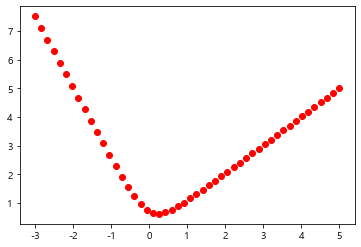

In [13]:
for w in np.linspace(-3, 5, 50) :
    c = cost(x_data, y_data, w)
    plt.plot(w, c, 'ro')
plt.show()

# 15. 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

$$ \begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(b + w x) 
\end{equation}
\begin{equation}
\hat{y} = \sigma(b + w_1 x_1 + ... + w_p x_p)
\end{equation} $$

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

$$ \begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation} $$

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#공부한시간, 출석일수
x_data = np.array( [[1,3],[2,2],[3,1],[4,6],[5,5],[6,4],])
y_data = np.array( [0,0,0,1,1,1])

In [16]:
model_logi = LogisticRegression()
model_logi.fit(x_data, y_data)

LogisticRegression()

In [17]:
model_logi.coef_

array([[0.78341156, 0.78341156]])

In [18]:
model_logi.intercept_

array([-5.48382067])

In [19]:
model_logi.predict_proba([[6, 6]])

array([[0.01951014, 0.98048986]])

In [20]:
model_logi.predict_proba([[6, 6]]).argmax(axis = 1)

array([1], dtype=int64)

In [21]:
model_logi.predict( [[6, 6]] )

array([1])

## 직접 계산해보기

In [22]:
def sigmoid(z) :
    return 1 / (1 + math.e ** -z)

In [23]:
w = model_logi.coef_.reshape(2, 1)
w

array([[0.78341156],
       [0.78341156]])

In [24]:
z = np.matmul([[6, 6]], w) + model_logi.intercept_
z

array([[3.9171181]])

In [25]:
sigmoid(z)

array([[0.98048986]])

In [26]:
# 위의 과정과 이 값이 같다
model_logi.predict_proba([[6, 6]])

array([[0.01951014, 0.98048986]])

In [27]:
## 1시간 공부 1시간 출석, 6시간 공부하고 5시간 출석한 학생의 합격유무를 예측
print(model_logi.predict([[1, 1], [6, 5]]))
print(model_logi.predict_proba([[1, 1], [6, 5]]))

[0 1]
[[0.98048756 0.01951244]
 [0.04173811 0.95826189]]


In [28]:
z = np.matmul([[1, 1], [6, 5]], w) + model_logi.intercept_
z

array([[-3.91699754],
       [ 3.13370653]])

In [29]:
sigmoid(z)

array([[0.01951244],
       [0.95826189]])

## 분류에서는 단순히 정확도를 가지고 판단하지 않는다

In [30]:
# 정확도
model_logi.score(x_data, y_data)

1.0

In [31]:
p = model_logi.predict(x_data)
p

array([0, 0, 0, 1, 1, 1])

In [32]:
p == y_data

array([ True,  True,  True,  True,  True,  True])

## Logistic 파라미터

penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

  l1: 맨하튼 거리, 오차 = 오차 + alpha * (|w1| + |w2|) <br>
  l2: 유클리디안 거리의 제곱, 오차 = 오차 + alpha * (W1^2 + w2^2)
  가중치 규제 (특성 수 줄이기, 과대적합 방지) <br>
  none 면 가중치 규제 미사용 <br>

  loss = loss + regularization strength X 가중치의 l1 혹은 l2 거리 (가중치 규제(과적합 방지))<br>
  가중치가 커지지 못하게 하기 (과적합 방지)<br>

C : float, optional (default=1.0)<br>
  alpha 의 역수<br>
  alpha 는 클수록 가중치 규제, 작을수록 정확하게 (과적합)<br>

  regularization strength(가중치 규제 항목에 곱해지는 값)의 역수 (과적합 방지)
  디폴트 1.0
  역수기 때문에 작을수록 과적합 방지

#### penalty:L1 혹은 L2 제약조건의 강도를 설정  

#### alpha: 높은 알파 값을 설정할 수록, 높은 제약조건을 설정하는 것

#### C: 
cost function의 C를 의미하는 것이며,
C의 경우에는 높은 C를 설정할 수록, 낮은 강도의 제약조건이 설정되고
낮은 C를 설정할 수록, 높은 강도의 제약조건이 설정

### solver : 
liblinear:L1제약조건, L2제약조건 두 가지를 모두 지원하며, 이것은 작은 데이터에 적합한 알고리즘. <br>
sag, saga: 이것을 확률적경사하강법을 기반으로 하기에 대용량 데이터에 적합한 알고이름이라고 하며, <br>
sag는 L1 제약조건만을 지원하고, saga는 L1, L2 제약조건 둘 다 지원함.

<div style="color:red">회귀알고리즘에서 ridge와 lasso와 계수를 다루는 방법이 유사하다고 보면 된다.
L1규제는 lasso처럼 계수를 0으로도 만들 수 있고,
L2규제는 ridge처럼 계수를 0으로 만들진 않지만 영향력이 작으면 0에 가까운 값을 만들어 회귀식을 구성하게 된다.
</div>

#### newton-cg, lbfgs (sag, saga)  이것은 멀티클래스의 분류 모델에 쓰는 것

현재까지는 이 중에서 lbfgs 알고리즘이 가장 성능이 좋다고 알려져 있고, newton-cg, lbfgs 도 L2제약조건만 지원함.<br>
결국 sag는 L1만 지원하고, newton-cg, saga, lbfgs 세 가지가 L2만 지원하고, <br>
liblinear, saga가 L1, L2 둘 다 지원<br>

#### penalty :  L1, L2 제약조건을 설정하는 하이퍼 파라미터이고, default는 L2
    
#### class_weight :데이터에 직접 가중치를 설정하여 학습의 강도를 다르게 할 수 있는 하이퍼 파라미터.

https://www.youtube.com/watch?v=Xm2C_gTAl8c


## 피마인디안 연습문제

정보 1 : 과거 임신 횟수 (pregnant)

정보 2 : 포도당 부하 검사 2시간 후 공복 혈당 농도 (plasma)

정보 3 : 확장기 혈압 (pressure)

정보 4 : 삼두근 피부 주름 두께 (thickness)

정보 5 : 혈정 인슐린 (insulin)

정보 6 : 체질량 지수 (BMI)

정보 7 : 당뇨병 가족력 (pedigree)

정보 8 : 나이 (age)

​

클래스 : 당뇨( 1) , 당뇨가 아님 ( 0 )

In [33]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 학습셋과 테스트셋의 정확를 구하시요
### test셋의 0번째 row 데이터로 당뇨병 유무 확인

In [34]:
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [37]:
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
p = model_lr.predict([x_test.iloc[0]])
p

array([0], dtype=int64)

In [39]:
model_lr.score(x_train, y_train)

0.7866449511400652

In [40]:
model_lr.score(x_test, y_test)

0.7857142857142857

In [41]:
p == y_test.iloc[0]

array([ True])

In [42]:
p = model_lr.predict(x_test)
p

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [43]:
(p == y_test.values).mean()

0.7857142857142857

# 16. Precision_recall_f1_ROC

In [44]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer



import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [45]:
x_data = np.array( [[25.8],[26.6],[28.1],[29.0],[30.5],
                    [31.0],[33.6],[39.3],[43.3],[45.8] ] )
y_data = np.array( [[1],[0],[0],[1],[1],[1],[1],[0],[0],[1]  ] )

In [46]:
df = pd.DataFrame( x_data, columns=['BMI'] )
df['당뇨여부'] = y_data
df

,BMI,당뇨여부
0,25.8,1
1,26.6,0
2,28.1,0
3,29.0,1
4,30.5,1
5,31.0,1
6,33.6,1
7,39.3,0
8,43.3,0
9,45.8,1


## confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

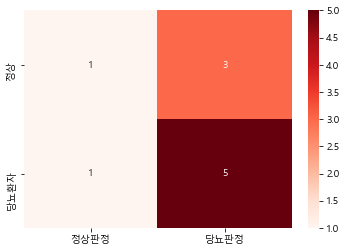

In [48]:
y_pred = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
cm = confusion_matrix(y_data, y_pred)

sns.heatmap(cm, annot = True, cmap = 'Reds', yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

In [49]:
# 정밀도
precision_score(y_data, y_pred)

0.625

In [50]:
# 재현률
recall_score(y_data, y_pred)

0.8333333333333334

## 피마인디안 데이터를 이용하여 confusion matrix(heat mat), precision, recall, f1 score  를 구하시요. (train test)


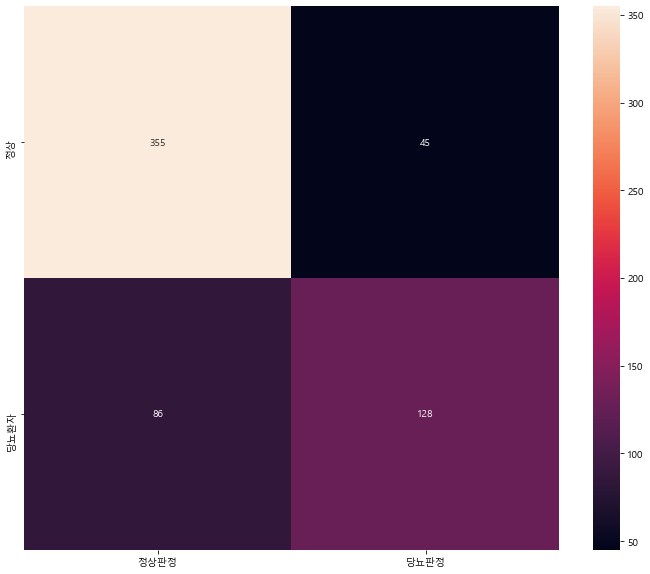

precision :  0.7398843930635838
recall :  0.5981308411214953
f1 score :  0.6614987080103358


In [51]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')

x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

# train
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True, fmt = '2d',yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

ps = precision_score(y_train, y_train_pred)
rs = recall_score(y_train, y_train_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_train, y_train_pred))
print('recall : ', recall_score(y_train, y_train_pred))
print('f1 score : ', f1score)

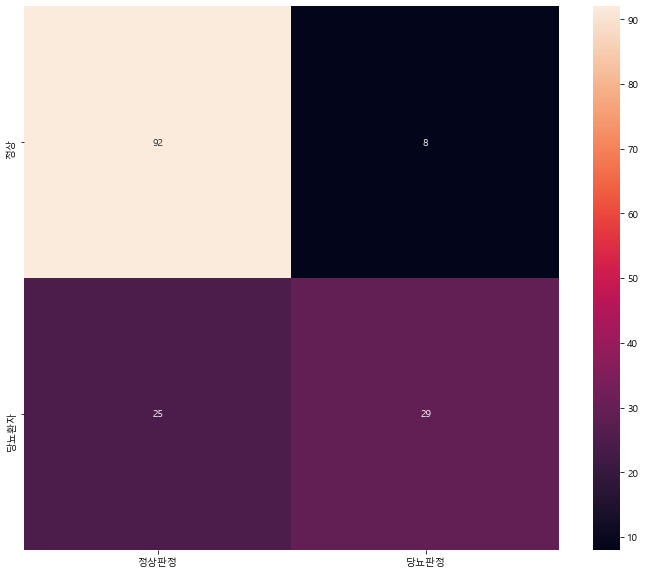

precision :  0.7837837837837838
recall :  0.5370370370370371
f1 score :  0.6373626373626374


In [52]:
# test
y_test_pred = model_lr.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (12, 10))
sns.heatmap(cm_train, annot = True, yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_test, y_test_pred))
print('recall : ', recall_score(y_test, y_test_pred))
print('f1 score : ', f1score)

In [53]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')

x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

In [54]:
model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
param_value = {'logisticregression__C': np.linspace(0,1, 10),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='f1')

In [55]:
gridS.best_params_

{'logisticregression__C': 0.1111111111111111,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [56]:
gridS.best_score_

0.646370349529018

In [57]:
y_predict = gridS.best_estimator_.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [58]:
f1_score(y_test, y_predict)

0.6304347826086957

## ROC(Receiver Operating Characteristic) curve는 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것

In [59]:
from sklearn.metrics import roc_curve
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [60]:
p = model_lr.predict_proba(x_test)

In [61]:
df = pd.DataFrame( [y_test] )
df = df.T   # 초기 데이터프레임이 돌아가있었음

In [62]:
df['proba'] = p[:, 1]
df

,Outcome,proba
488,0,0.074495
413,0,0.166796
112,0,0.043434
222,0,0.451390
711,0,0.290328
...,...,...
139,0,0.179818
178,0,0.746856
654,0,0.096614
110,1,0.548493


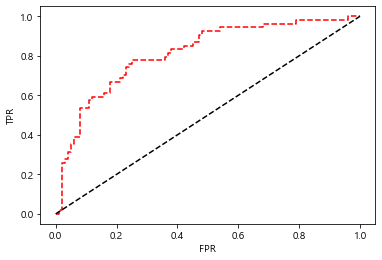

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)
# print(fpr)
# print(tpr)
# print(thresholds)
plt.plot(fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [64]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 연습문제

feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5~ 8 .titanic 통계값을 구하시요(문제는 자율)


In [65]:
titanic_df = titanic[['pclass','sex','fare','survived']]
x_data = titanic_df.drop('survived', axis = 1)
y_data = titanic_df[['survived']]
x_data['sex'] = x_data['sex'].replace(['male', 'female'], [0, 1])
x_data

,pclass,sex,fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500
...,...,...,...
886,2,0,13.0000
887,1,1,30.0000
888,3,1,23.4500
889,1,0,30.0000


## 1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 

In [66]:
# modeling
scalex= StandardScaler()
x_data['fare'] = scalex.fit_transform(x_data[['fare']].values)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

model_logistic = make_pipeline(LogisticRegression() )
param_value = {'logisticregression__C': np.linspace(0,1, 10),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

# predict (1등급, female, 32달러)
scv = scalex.transform([[32]])
print(gridS.predict_proba([[1, 1, scv[0]]]))
print(gridS.predict([[1, 1, scv[0]]]))

# train, test, f1 score 를 구하시요

y_predict = gridS.predict(x_test)
print('test precision score : ', precision_score(y_test, y_predict))
print('test recall score : ', recall_score(y_test, y_predict))
print('f1_score : ', f1_score(y_test, y_predict))

[[0.16664891 0.83335109]]
[1]
test precision score :  0.7741935483870968
test recall score :  0.6956521739130435
f1_score :  0.732824427480916


In [67]:
x_data

,pclass,sex,fare
0,3,0,-0.502445
1,1,1,0.786845
2,3,1,-0.488854
3,1,1,0.420730
4,3,0,-0.486337
...,...,...,...
886,2,0,-0.386671
887,1,1,-0.044381
888,3,1,-0.176263
889,1,0,-0.044381


In [68]:
# predict (1등급, female, 32달러)
scv = scalex.transform([[32]])
print(gridS.predict_proba([[1, 1, scv[0]]]))
print(gridS.predict([[1, 1, scv[0]]]))

[[0.16664891 0.83335109]]
[1]


In [69]:
# train, test, f1 score 를 구하시요
y_predict = model_lr.predict(x_test)
f1_score(y_test, y_predict)

ValueError: X has 3 features, but StandardScaler is expecting 8 features as input.

In [70]:
gridS.best_params_

{'logisticregression__C': 0.1111111111111111,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [71]:
y_predict = gridS.predict(x_test)
print('test precision score : ', precision_score(y_test, y_predict))
print('test recall score : ', recall_score(y_test, y_predict))
print('f1_score : ', f1_score(y_test, y_predict))

test precision score :  0.7741935483870968
test recall score :  0.6956521739130435
f1_score :  0.732824427480916


560    0.130399
393    0.835829
592    0.130386
601    0.130402
404    0.584932
         ...   
113    0.584994
111    0.585242
348    0.130603
179    0.130205
659    0.351427
Name: proba, Length: 179, dtype: float64

[0.         0.         0.         0.         0.         0.00909091
 0.00909091 0.02727273 0.03636364 0.03636364 0.04545455 0.04545455
 0.04545455 0.05454545 0.05454545 0.06363636 0.06363636 0.07272727
 0.07272727 0.09090909 0.10909091 0.11818182 0.12727273 0.12727273
 0.12727273 0.12727273 0.13636364 0.13636364 0.14545455 0.14545455
 0.20909091 0.20909091 0.23636364 0.24545455 0.26363636 0.28181818
 0.30909091 0.30909091 0.34545455 0.36363636 0.39090909 0.41818182
 0.43636364 0.45454545 0.46363636 0.47272727 0.49090909 0.5
 0.51818182 0.52727273 0.52727273 0.53636364 0.53636364 0.54545455
 0.55454545 0.58181818 0.6        0.60909091 0.68181818 0.69090909
 0.76363636 0.77272727 0.79090909 0.83636364 0.86363636 0.9
 0.92727273 0.94545455 0.95454545 0.99090909 1.        ]
[0.         0.01449275 0.08695652 0.11594203 0.30434783 0.31884058
 0.37681159 0.37681159 0.37681159 0.4057971  0.4057971  0.42028986
 0.44927536 0.44927536 0.50724638 0.50724638 0.55072464 0.55072464
 0.56521739 0.56521

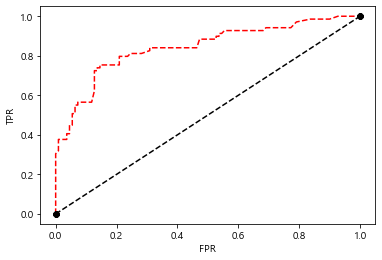

In [76]:
p = gridS.predict_proba(x_test)
p

df = y_test.copy()

df['proba'] = p[:, 1]

df.sort_values(by='proba')

display(df['proba'])

fpr, tpr, thresholds = roc_curve(y_test.values, df['proba'])
print(fpr)
print(tpr)
print(thresholds)
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1], [0,1], 'k--8')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [73]:
df['proba']

560    0.130399
393    0.835829
592    0.130386
601    0.130402
404    0.584932
         ...   
113    0.584994
111    0.585242
348    0.130603
179    0.130205
659    0.351427
Name: proba, Length: 179, dtype: float64

In [74]:
y_test.values

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    